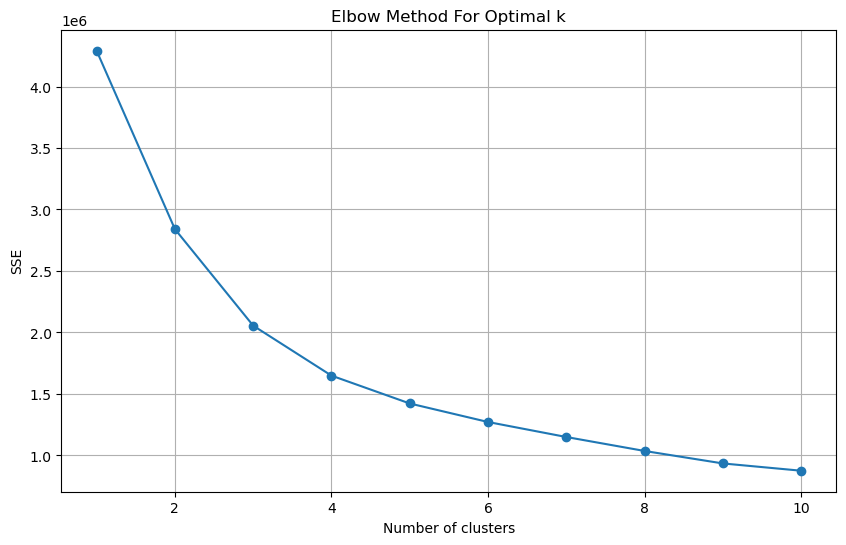

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. 错误处理：确保文件存在且格式正确
try:
    data = pd.read_csv('Citywide_PayrollData2022.csv')
except Exception as e:
    print(f"Error reading the file: {e}")
    exit()

# 2. 选择数值列
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data[numerical_cols]

# 3. 使用标准化方法
scaler = StandardScaler()
normed_array = scaler.fit_transform(numerical_data)
normed = pd.DataFrame(normed_array, columns=numerical_cols)

# 4. 使用Elbow方法选择最佳的k值
list_SSE = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(normed)
    list_SSE.append(km.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range_k, list_SSE, marker='o', linestyle='-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()



In [2]:

# 5. 使用k=3进行K-Means聚类
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=123)
data['Cluster'] = kmeans.fit_predict(normed)

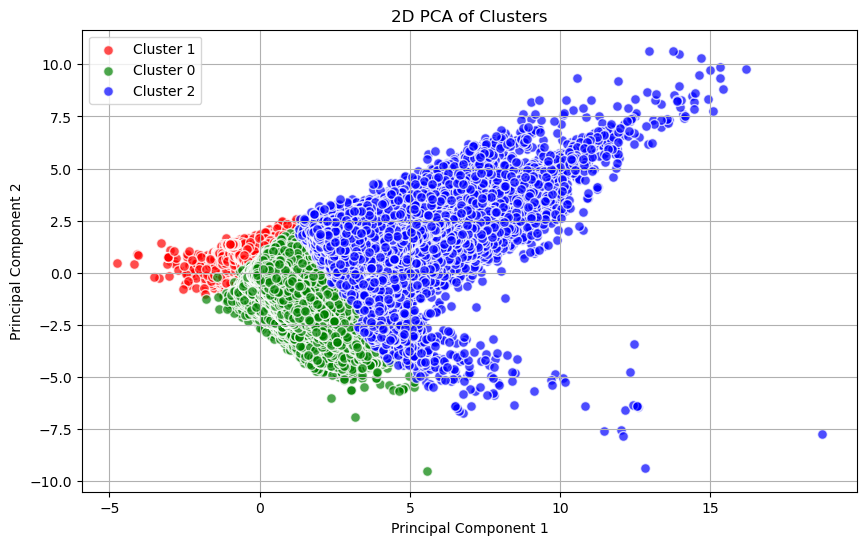

In [3]:
from sklearn.decomposition import PCA

# 使用PCA进行降维
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normed)

# 将主成分和聚类标签合并为一个新的DataFrame
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Cluster'] = data['Cluster']

# 为每个聚类绘制散点图
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']

for cluster, color in zip(df_pca['Cluster'].unique(), colors):
    plt.scatter(df_pca[df_pca['Cluster'] == cluster]['Principal Component 1'],
                df_pca[df_pca['Cluster'] == cluster]['Principal Component 2'],
                s=50, c=color, label=f'Cluster {cluster}', alpha=0.7, edgecolors='w')

plt.title('2D PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
# 查看PCA组件的组成
components = pd.DataFrame(pca.components_, columns=numerical_cols, index=['Principal Component 1', 'Principal Component 2'])

# 打印每个主成分对应的权重
print(components.T)


                    Principal Component 1  Principal Component 2
Fiscal Year                      0.000000              -0.000000
Payroll Number                  -0.269348              -0.267049
Base Salary                      0.325403              -0.601771
Regular Hours                    0.405962               0.116996
Regular Gross Paid               0.372629              -0.506759
OT Hours                         0.433916               0.389261
Total OT Paid                    0.433466               0.350374
Total Other Pay                  0.376472              -0.147571


In [5]:
# 重新运行PCA以获得前三个主成分
pca_3d = PCA(n_components=3)
pca_3d.fit(normed)

# 获取前三个主成分解释的方差比率
explained_variance_ratio_3d = pca_3d.explained_variance_ratio_

# 打印前三个主成分解释的方差比率
print(f"Explained variance ratio of the first component: {explained_variance_ratio_3d[0]:.4f}")
print(f"Explained variance ratio of the second component: {explained_variance_ratio_3d[1]:.4f}")
print(f"Explained variance ratio of the third component: {explained_variance_ratio_3d[2]:.4f}")
print(f"Total explained variance ratio of the first three components: {sum(explained_variance_ratio_3d):.4f}")


Explained variance ratio of the first component: 0.5000
Explained variance ratio of the second component: 0.2002
Explained variance ratio of the third component: 0.1195
Total explained variance ratio of the first three components: 0.8196


从您提供的输出中，我们可以得到以下结论：

第一个主成分解释了数据中50%的方差。
第二个主成分解释了数据中20.02%的方差。
第三个主成分解释了数据中11.95%的方差。
前三个主成分共同解释了数据中81.96%的方差。
这意味着，通过使用前三个主成分，您已经捕获了数据中的大部分变化。而且，由于第三个主成分对方差的贡献相对较小（只有11.95%），因此，将数据降至2D已经给出了数据中大部分的信息。

但是，如果您希望更深入地探索数据的结构，或者想看看第三个主成分会给可视化带来什么样的差异，那么您完全可以进行三维可视化。这将提供一个额外的角度来观察数据中的聚类结构。

如果您决定进行三维可视化并需要相应的代码，我会很高兴为您提供。


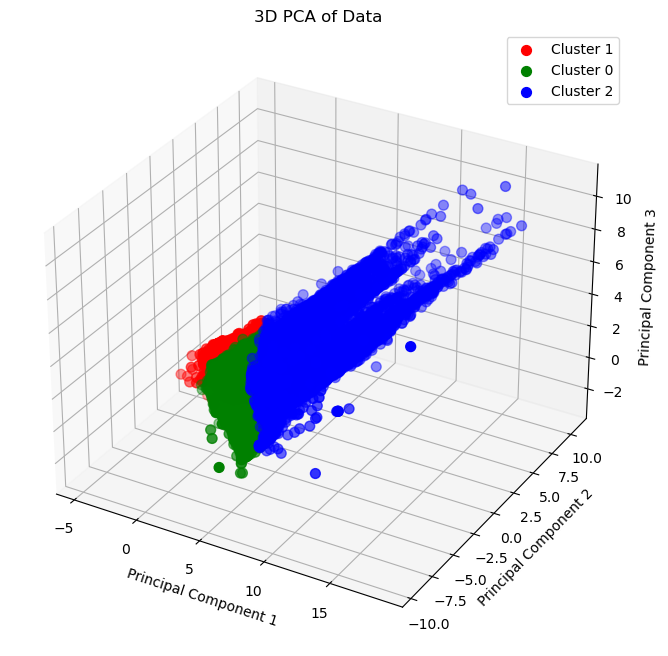

In [6]:
from mpl_toolkits.mplot3d import Axes3D

# 使用PCA将数据降至三维
transformed_3d = pca_3d.transform(normed)

# 创建一个新的DataFrame来存储三维数据及其对应的聚类标签
df_3d = pd.DataFrame(transformed_3d, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])
df_3d['Cluster'] = data['Cluster']

# 创建一个3D散点图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 为每个聚类分配不同的颜色
colors = ['r', 'g', 'b']
for cluster, color in zip(df_3d['Cluster'].unique(), colors):
    cluster_data = df_3d[df_3d['Cluster'] == cluster]
    ax.scatter(cluster_data['Principal Component 1'], cluster_data['Principal Component 2'], cluster_data['Principal Component 3'], c=color, label=f'Cluster {cluster}', s=50)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
ax.set_title('3D PCA of Data')
plt.show()


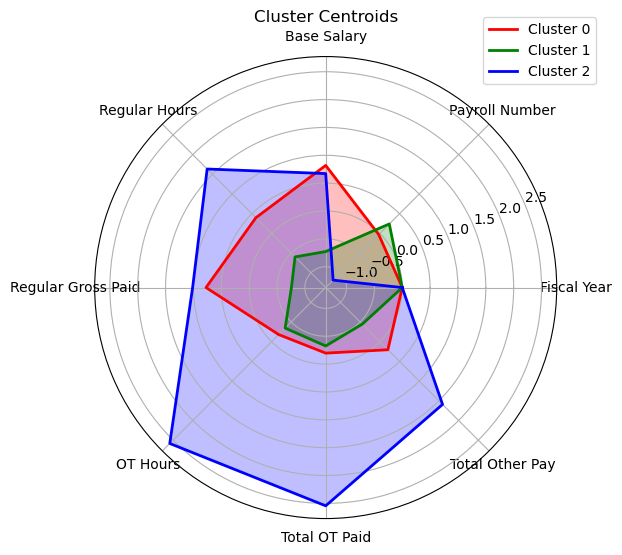

In [7]:
import numpy as np

def plot_radar_chart(df, title=""):
    # 计算要绘制的角度
    angles = np.linspace(0, 2 * np.pi, len(df.columns), endpoint=False).tolist()
    angles += angles[:1]

    # 设置雷达图的参数
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    colors = ['r', 'g', 'b']
    
    # 为每个聚类绘制雷达图
    for i, color in enumerate(colors):
        values = df.iloc[i].tolist()
        values += values[:1]  # 闭合图形
        ax.plot(angles, values, color=color, linewidth=2, label=f'Cluster {i}')
        ax.fill(angles, values, color=color, alpha=0.25)
    
    # 添加特征标签
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(df.columns)
    ax.set_title(title)

    # 添加图例
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

# 计算每个聚类的质心
cluster_centroids = kmeans.cluster_centers_

# 创建一个DataFrame来存储质心的值
df_cluster_centroids = pd.DataFrame(cluster_centroids, columns=numerical_cols)

# 绘制雷达图
plot_radar_chart(df_cluster_centroids, title="Cluster Centroids")


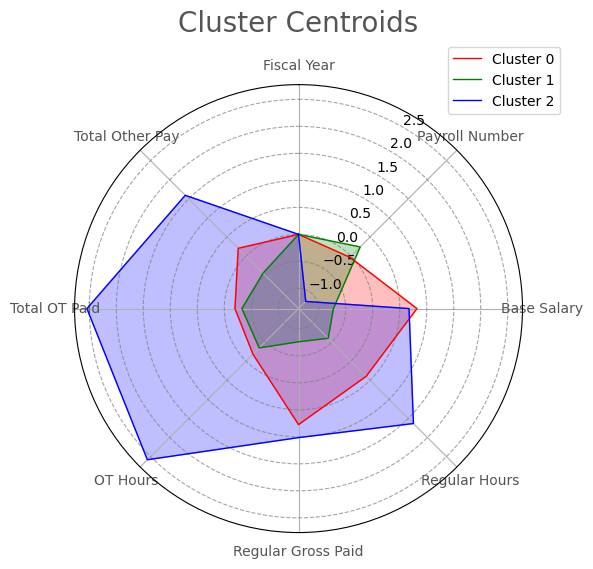

In [9]:
def radar_plot_cluster_centroids(df_centroids):
    # 设置雷达图的角度和标签
    labels = df_centroids.columns
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # 设置雷达图的样式
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    colors = ['r', 'g', 'b']
    
    # 为每个聚类绘制雷达图
    for i, color in enumerate(colors):
        values = df_centroids.iloc[i].tolist()
        values += values[:1]
        ax.plot(angles, values, color=color, linewidth=1, label=f'Cluster {i}')
        ax.fill(angles, values, color=color, alpha=0.25)
    
    # 设置特征标签位置和标题
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, color='#555555')
    ax.set_title("Cluster Centroids", size=20, color='#555555', y=1.1)

    # 设置Y轴的grid和标签
    ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)
    ax.set_rlabel_position(30)

    # 添加图例和显示图形
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.tight_layout()
    plt.show()

# 使用上述函数绘制雷达图
radar_plot_cluster_centroids(df_cluster_centroids)
